# #HousePrice Predictor

#For data search "Housing data boston ml repository" in Google

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Data.csv")

In [3]:
# housing.head()

In [4]:
# housing.info()

In [5]:
# housing["CHAS"].value_counts()

In [6]:
# housing["CRIM"].value_counts()

In [7]:
# housing.describe()

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
# housing.hist(bins=50 , figsize=(29,15))

# #Train-Teast splitting

In [11]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set, test_set = split_train_test(housing, 0.2)

In [13]:
# print(f"Rows in train_set: {len(train_set)}\nRows in test_set: {len(test_set)}")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train_set: {len(train_set)}\nRows in test_set: {len(test_set)}")

Rows in train_set: 404
Rows in test_set: 101


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
housing = pd.read_csv("Data.csv")
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]    

In [16]:
# start_train_set

In [17]:
start_train_set.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602607,10.836634,11.339406,0.069307,0.558093,6.275519,68.924010,3.745554,9.747525,412.633663,18.468812,353.404579,12.810842,22.508168
std,8.099469,22.150636,6.878247,0.254290,0.116880,0.715437,28.293382,2.099433,8.722386,168.532844,2.125823,96.074275,7.233244,9.383450
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.875000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.892500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.208000,77.950000,3.122200,5.000000,341.000000,19.000000,390.955000,11.650000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.645000,17.112500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [18]:
# start_train_set.info()

In [19]:
start_test_set["CHAS"].value_counts()
start_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
# 94/7, 376/28

In [21]:
housing = start_train_set.copy()

# Looking for corelations

In [22]:
corr_matrix = housing.corr()

In [23]:
# corr_matrix["MEDV"].sort_values(ascending = False)

In [24]:
# from pandas.plotting import scatter_matrix
# attributes = ["MEDV", "RM", "ZN", "LSTAT"]
# scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

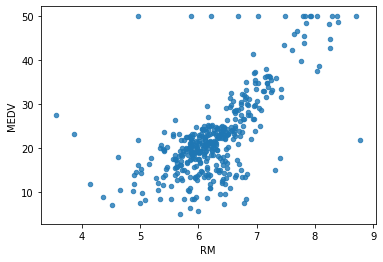

In [25]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

# Trying out Atribute combination

In [26]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [27]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [28]:
# housing.head()

In [29]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.679748
B          0.361750
ZN         0.339881
DIS        0.240869
CHAS       0.205148
AGE       -0.363788
RAD       -0.374905
CRIM      -0.393733
NOX       -0.422943
TAX       -0.456881
INDUS     -0.473671
PTRATIO   -0.494772
TAXRM     -0.525682
LSTAT     -0.740523
Name: MEDV, dtype: float64

In [30]:
housing=start_train_set.drop("MEDV", axis=1)
housing_label=start_train_set["MEDV"].copy()

# Missing Attributes

In [31]:
# to take care of missing attributes you have three options:
#     1.Get rid of missing data points
#     2. Get rid of whole attribute
#     3. set the value to some value(0, mean or median)
    

In [32]:
a= housing.dropna(subset=["RM"])#option1
a.shape


(401, 13)

In [33]:
housing.drop("RM", axis=1).shape #option2
#There is no RM column

(404, 12)

In [34]:
median = housing["RM"].median()#option3

In [35]:
median

6.208

In [36]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing.shape

(404, 13)

In [38]:
housing.describe() #RM has missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602607,10.836634,11.339406,0.069307,0.558093,6.275519,68.924010,3.745554,9.747525,412.633663,18.468812,353.404579,12.810842
std,8.099469,22.150636,6.878247,0.254290,0.116880,0.715437,28.293382,2.099433,8.722386,168.532844,2.125823,96.074275,7.233244
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.875000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.892500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.208000,77.950000,3.122200,5.000000,341.000000,19.000000,390.955000,11.650000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.645000,17.112500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_.shape


(13,)

In [41]:
X = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [43]:
housing_tr.describe() #RM has full count

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602607,10.836634,11.339406,0.069307,0.558093,6.275017,68.924010,3.745554,9.747525,412.633663,18.468812,353.404579,12.810842
std,8.099469,22.150636,6.878247,0.254290,0.116880,0.712792,28.293382,2.099433,8.722386,168.532844,2.125823,96.074275,7.233244
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.892500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.208000,77.950000,3.122200,5.000000,341.000000,19.000000,390.955000,11.650000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.645000,17.112500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SKlearn design

primarily, three types of objects
1. Estimators - It estimates some parameter based on dataset. Eg-imputer. It has a fit method and transform method. Fit method - fits the dataset and calculated internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform(). Which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Features scaling

primarily, two types of feature scaling methods:
1. min-max scaling(Normalization)
    (val - min)/(max - min)
    sklearn provides a class called MinMaxScaler for this
2. standerdization
    (value - mean)/std
    sklearn provides a class called StandardScaler for this

## Creating a pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    #........add as many as you want,
    ("std_scl", StandardScaler()),
])

In [45]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [46]:
housing_num_tr.shape

(404, 13)

## Selcting a desired model for dragon realestate

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [48]:
some_data = housing.iloc[:5]

In [49]:
some_label = housing_label.iloc[:5]

In [50]:
prepared_data = my_pipeline.transform(some_data)

In [51]:
predict_label = model.predict(prepared_data)

In [52]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_prediction = model.predict(housing_num_tr)
mse=mean_squared_error(housing_prediction,housing_label)
rmse = np.sqrt(mse)

In [54]:
rmse

1.272260447408314

## using better evaluation technique - Cross validation

In [55]:
#1,2,3,4,5,6,7,8,9,10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring="neg_mean_squared_error", cv=10)
rmse = np.sqrt(-scores)

In [56]:
rmse 

array([2.72817787, 2.60579871, 4.38056158, 2.66640737, 3.39713497,
       2.29364177, 4.79310177, 3.41598534, 3.43708275, 3.42552379])

In [57]:
def print_scores(scores):
    print("scores: ",list(scores))
    print("mean: ",scores.mean())
    print("std_dev: ",scores.std())

In [58]:
print_scores(rmse)

scores:  [2.7281778650620643, 2.6057987071988165, 4.380561582775413, 2.6664073710317937, 3.397134973032426, 2.2936417658387733, 4.793101769731162, 3.4159853373514326, 3.4370827455852737, 3.4255237884154304]
mean:  3.314341590602259
std_dev:  0.7533550041431369


## Saving the model

In [59]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [60]:
x_test = start_test_set.drop("MEDV", axis=1)
y_test = start_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
y_predict = model.predict(x_test_prepared)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [61]:
mse, rmse

(8.732856287128707, 2.9551406543731056)

In [62]:
prepared_data[0]

array([-0.43938989,  3.12628155, -1.12077291, -0.27288841, -1.42281704,
       -0.23460469, -1.30665866,  2.61095942, -1.00412559, -0.58003366,
       -0.97438822,  0.41149808, -0.86386967])

## using the model

In [63]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-0.43938989,  3.12628155, -1.12077291, -0.27288841, -1.42281704,
       -0.23460469, -1.30665866,  2.61095942, -1.00412559, -0.58003366,
       -0.97438822,  0.41149808, -0.86386967]])
model.predict(features)

array([22.182])